In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("/home/angel-tamang/Nepali Hate Sentiment Detection/Project/Part 1/Data/Raw/Nepali_dataset.csv")
print(df1.head())


                                                Text           Aspect Term  \
0  गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...        जोगाउन को लागि   
1  दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...             लखेटनु पछ   
2        नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !  ससकृती ध्वस्त पार्ने   
3  मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...              भुमाफिया   
4  नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...              बेची सके   

  Sentiment  Polarity  
0   GENERAL         0  
1   GENERAL         1  
2   GENERAL         1  
3   GENERAL         1  
4   GENERAL         1  


In [3]:
# Remove 'FEEDBACK' from df1
df1 = df1[df1['Sentiment'] != 'FEEDBACK']

In [4]:
print(df1.loc[:,"Sentiment":"Polarity"].value_counts())

Sentiment  Polarity
GENERAL    1           1781
           0           1054
PROFANITY  0            303
VIOLENCE   1            173
           0            114
PROFANITY  1            104
Name: count, dtype: int64


In [5]:
count1  = len(df1.loc[:,"Sentiment"].to_numpy())
print(count1)

3529


## Deduplicated dataset of above dataset

In [6]:
df2 = pd.read_csv("/home/angel-tamang/Nepali Hate Sentiment Detection/Project/Part 2/Data/Preprocessed/Cleaned_Nepali_dataset.csv")
df2.head()

,Text,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1


In [7]:
df2.loc[:,"Target"].value_counts()

Target
1    1358
0     901
2     250
5     159
4     108
3      83
Name: count, dtype: int64

In [8]:
def map_sentiments(value):
    if value in [0, 1]:
        return  "GENERAL"
    elif value in [2, 3]:
        return "PROFANITY"
    elif value in [4, 5]:
        return "VOILENCE"

def map_polarity(value):
    if value in [0,2,4]:
        return 0
    else:
        return 1

df2["Polarity"] = df2["Target"].apply(map_polarity)
df2["Sentiment"] = df2["Target"].apply(map_sentiments)
df2.head()

,Text,Target,Polarity,Sentiment
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0,0,GENERAL
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1,1,GENERAL
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1,1,GENERAL
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1,1,GENERAL
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1,1,GENERAL


In [9]:
df2 = df2.loc[:,["Text", "Sentiment", "Polarity", "Target"]]
print(df2.loc[:,"Sentiment":"Polarity"].value_counts())
count2 = len(df2.loc[:,"Sentiment"].to_numpy())
print( count2 )

Sentiment  Polarity
GENERAL    1           1358
           0            901
PROFANITY  0            250
VOILENCE   1            159
           0            108
PROFANITY  1             83
Name: count, dtype: int64
2859


/tmp/ipykernel_49442/1301967964.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_counts = df1.groupby(['Sentiment', 'Polarity']).size().reset_index(name='Count')
/tmp/ipykernel_49442/1301967964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2_counts = df2.groupby(['Sentiment', 'Polarity']).size().reset_index(name='Count')


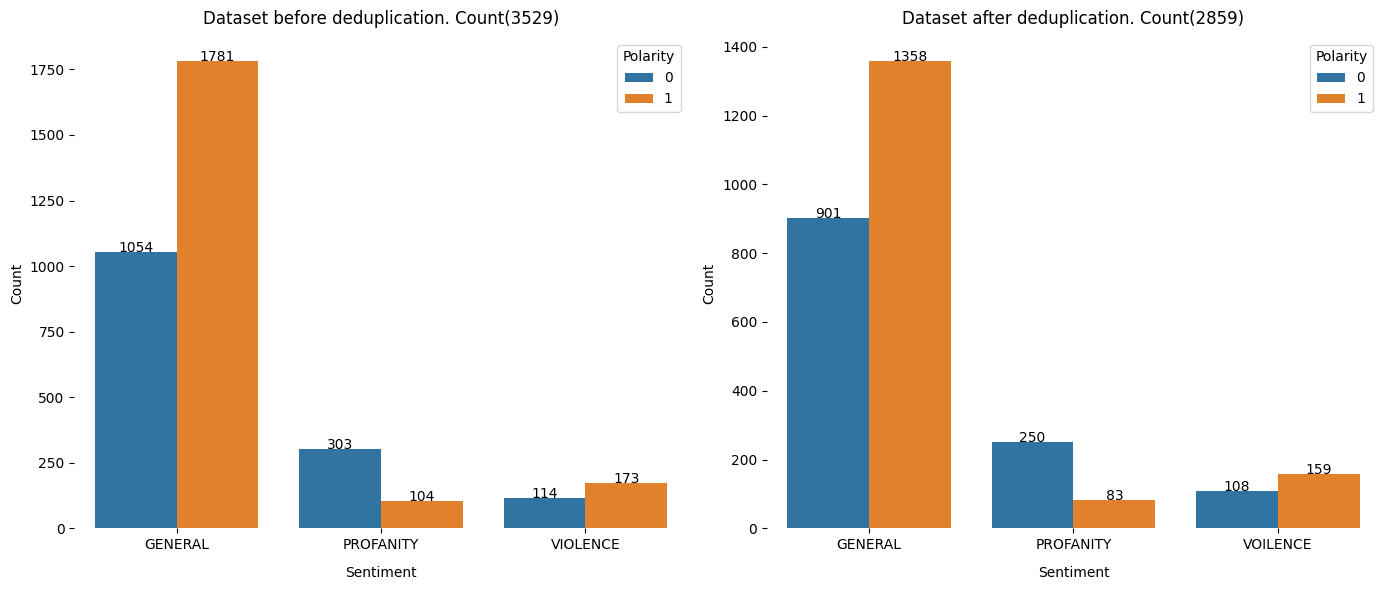

In [14]:
df1_counts = df1.groupby(['Sentiment', 'Polarity']).size().reset_index(name='Count')
df2_counts = df2.groupby(['Sentiment', 'Polarity']).size().reset_index(name='Count')

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot df1
ax1 = sns.barplot(ax=axes[0], x='Sentiment', y='Count', hue='Polarity', data=df1_counts)
axes[0].set_title(f"Dataset before deduplication. Count({count1})", pad=10)
axes[0].set_xlabel("Sentiment", labelpad=10)

# Add labels to the bars
for p in ax1.patches:
    if p.get_height() > 0:
        ax1.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')

# Plot df2
ax2 = sns.barplot(ax=axes[1], x='Sentiment', y='Count', hue='Polarity', data=df2_counts)
axes[1].set_title(f"Dataset after deduplication. Count({count2})", pad=10)
axes[1].set_xlabel("Sentiment", labelpad=10)

# Add labels to the bars
for p in ax2.patches:
    if p.get_height() > 0:
        ax2.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')

# Remove spines
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()